In [ ]:
import pandas as pd
import numpy as np
import math
import re
import random
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/IMDB Dataset.csv.zip'

Archive:  /content/drive/MyDrive/IMDB Dataset.csv.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df = df.sample(frac=1)

In [ ]:
df['target'] = 0

a = 0
for i, row in df.iterrows():
    if ((row['sentiment'] == 'positive')):
        a = 1
    else:
        a = 0
    df.at[i,'target'] = a

In [ ]:
df[['review','sentiment', 'target']].iloc[range(10)]

,review,sentiment,target
29223,I really liked this movie. I watched it last n...,positive,1
34213,"Shecky, is a god damned legend, make no mistak...",negative,0
5159,"Along with Fernando Fragata, João Mário Grilo,...",positive,1
5585,The second alternate Gundam universe tale (G-G...,positive,1
20044,I went to see the Omega Code with a group of o...,negative,0
12911,While the prominent and over use of the play-l...,negative,0
33385,this flick is strange but i liked it a lot. it...,positive,1
42832,With a relatively small budget for an animated...,positive,1
30989,I first saw this video 15 years ago. I thought...,positive,1
40768,Another FINE effort by America's most UNDERrat...,negative,0


In [ ]:
# removing mentions, links, tags

import re

def removing_mentions(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
    text = re.sub(r'@[-)]+', '', text)            # removing @mentions

    return text

def removeing_links(text):
    text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'http?\/\/\S+', '', text)     # removing the hyper link
    
    return text

def removing_tags(text):
    text = re.sub(r'#', '', text )              # removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)         # removing RT
    text = re.sub(r'&[a-z;]+', '', text)        # removing '&gt;'
    
    return text

In [ ]:
df['review'] = df['review'].apply(removeing_links)
df['review'] = df['review'].apply(removing_mentions)
df['review'] = df['review'].apply(removing_tags)

In [ ]:
df.to_csv('/content/drive/MyDrive/dataset_v1.csv')

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stop_words(tweet):
    words = tweet.lower().split()
    clean_words = []
    for word in words:
        if word not in stopwords:
            clean_words.append(word)
            
    clean_tweet = ' '.join(clean_words)
    return clean_tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review'] = df['review'].apply(lambda review : remove_stop_words(str(review)))

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 8.7 MB/s 


In [ ]:
# df.to_csv('without_stopwords.csv')
df.to_csv('/content/drive/MyDrive/without_stopwords.csv')

In [ ]:
nltk.download('wordnet')
def lemmatization(tweet):
    lemmatizer = WordNetLemmatizer()
    
    tokenizer = WhitespaceTokenizer()
    tokens = tokenizer.tokenize(tweet)

    tweet_tokens = []
    for word in tokens:
        word_lemmatized = lemmatizer.lemmatize(word)
        tweet_tokens.append(word_lemmatized)

    clean_tweet = ' '.join(tweet_tokens)
    return clean_tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['review'] = df['review'].apply(lambda review : lemmatization(str(review)))

In [ ]:
df[['review','sentiment', 'target']].iloc[range(10)]

,review,sentiment,target
29223,really liked movie. watched last night public ...,positive,1
34213,"shecky, god damned legend, make mistake. recen...",negative,0
5159,"along fernando fragata, joão mário grilo, abi ...",positive,1
5585,second alternate gundam universe tale (g-gunda...,positive,1
20044,went see omega code group christian totaling 1...,negative,0
12911,prominent use play-like format total operation...,negative,0
33385,flick strange liked lot. good girl love bad bo...,positive,1
42832,relatively small budget animated film $60 mill...,positive,1
30989,first saw video 15 year ago. thought excellent...,positive,1
40768,another fine effort america's underrated filmm...,negative,0


In [ ]:
df.to_csv('/content/drive/MyDrive/after_lemmatization.csv')

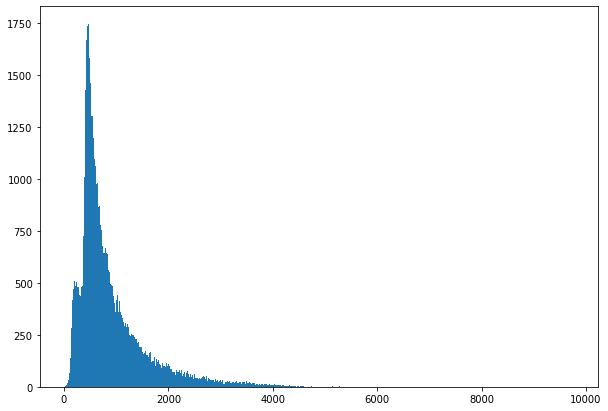

In [ ]:
df['length'] = 0

a = 0
for i, row in df.iterrows():
    l = len(row['review'])
    df.at[i,'length'] = l

length_array = df['length'].to_numpy()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(length_array, bins=500)
 
# Show plot
plt.show()

In [ ]:
df.head()

,review,sentiment,target,length
8718,"hard use word movie, since contains none itsel...",positive,1,241
14211,say necromaniac/schizophreniac 2 series is... ...,positive,1,1271
48907,so-so thriller starring brad pitt juliette lew...,positive,1,480
29804,"sat part che last night, back back brief bathr...",positive,1,2911
38386,unfortunately one movie least make laugh unbel...,negative,0,782


In [ ]:
df.to_csv('/content/drive/MyDrive/updated_dataset.csv')

In [ ]:
#CNN

In [ ]:
import pandas as pd
import numpy as np
import math
import re
import random
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Bidirectional
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Soft Computing/Project/updated_dataset.csv')


#without removing stop words and lemmatization
df = pd.read_csv('/content/drive/MyDrive/dataset_v1.csv')

In [ ]:
df.head()

,Unnamed: 0,review,sentiment,target
0,8718,"It's hard to use words for this movie, since i...",positive,1
1,14211,All I can say about the Necromaniac/Schizophre...,positive,1
2,48907,So-so thriller starring Brad Pitt and Juliette...,positive,1
3,29804,"I sat through both parts of Che last night, ba...",positive,1
4,38386,Unfortunately this is not one of those movies ...,negative,0


In [ ]:
#Vectorization

In [ ]:
dataset = df
unique_label = np.unique(df["target"])
num_classes = len(unique_label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['review'].values, pd.get_dummies(dataset['target']).values, test_size=0.30)

MAX_NB_WORDS = 124335
MAX_SEQUENCE_LENGTH = 4000
EMBEDDING_DIM = 250

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index
print("found ", len(word_index), " unique tokens")

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(train_seq, maxlen=MAX_SEQUENCE_LENGTH)
pad_test = pad_sequences(test_seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', pad_train.shape)

print(pad_train.shape,y_train.shape)
print(pad_test.shape,y_test.shape)

found  124335  unique tokens
Shape of data tensor: (35000, 4000)
(35000, 4000) (35000, 2)
(15000, 4000) (15000, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# define model
model = Sequential()

model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=pad_train.shape[1]))

model.add(Conv1D(filters = 50, kernel_size = 3))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 40, kernel_size = 3))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters=30, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

epochs = 50
batch_size = 128

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4000, 250)         31083750  
                                                                 
 conv1d (Conv1D)             (None, 3998, 50)          37550     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1999, 50)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1997, 40)          6040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 998, 40)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 996, 30)          

In [ ]:
history = model.fit(pad_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(pad_test, y_test))

Epoch 1/50
274/274 [==============================] - 86s 269ms/step - loss: 0.4141 - accuracy: 0.7980 - val_loss: 0.2701 - val_accuracy: 0.8935
Epoch 2/50
274/274 [==============================] - 74s 269ms/step - loss: 0.1561 - accuracy: 0.9487 - val_loss: 0.2819 - val_accuracy: 0.8901
Epoch 3/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0686 - accuracy: 0.9816 - val_loss: 0.3289 - val_accuracy: 0.8915
Epoch 4/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0309 - accuracy: 0.9934 - val_loss: 0.4097 - val_accuracy: 0.8830
Epoch 5/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0202 - accuracy: 0.9962 - val_loss: 0.4364 - val_accuracy: 0.8875
Epoch 6/50
274/274 [==============================] - 71s 259ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.4446 - val_accuracy: 0.8889
Epoch 7/50
274/274 [==============================] - 71s 258ms/step - loss: 0.0168 - accuracy: 0.9960 - val_loss: 0.4551 - val_ac

In [ ]:
evaluation = model.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

469/469 [==============================] - 11s 23ms/step - loss: 0.7640 - accuracy: 0.8815
Accuracy is :  88.14666867256165


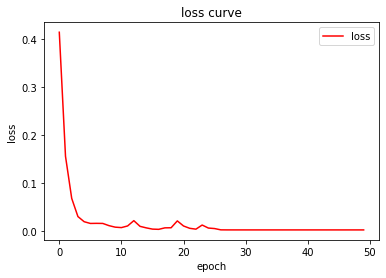

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], color='r')
# pyplot.plot(history.history['val_loss'], color='b')
pyplot.title('loss curve')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'val_loss'], loc='upper right')
pyplot.show()

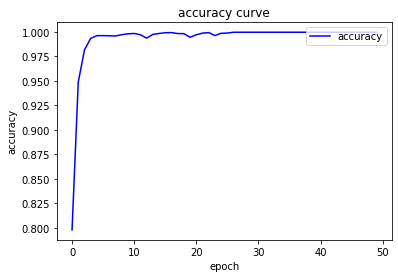

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()

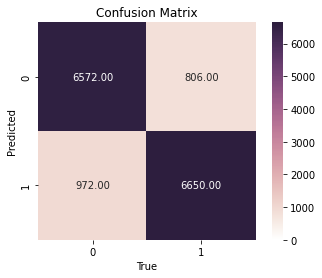

In [ ]:
y_pred = model.predict(pad_test)

new_y_pred = np.argmax(y_pred, axis=1)
new_y_test = np.argmax(y_test, axis=1)

conf_arr = np.zeros((num_classes, num_classes))

for i in range(len(new_y_pred)):
        conf_arr[new_y_pred[i]][new_y_test[i]] += 1

df_cm = pd.DataFrame(conf_arr, index = unique_label, columns = unique_label)



fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(df_cm, annot=True, vmin=0.0, vmax=np.max(conf_arr), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [ ]:
print(classification_report(new_y_test, new_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7544
           1       0.87      0.89      0.88      7456

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print('Pricision = ',precision)
print('F1_score = ',f1_score)
print('Recall = ',recall)

Pricision =  87.24744161637365
F1_score =  88.2079851439183
Recall =  89.18991416309014


In [ ]:
model.save('/content/drive/MyDrive/saved_info/CNN/v5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_info/CNN/v5/assets


In [ ]:
import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/saved_info/CNN/v5')

In [ ]:
evaluation = loaded_model.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

469/469 [==============================] - 11s 24ms/step - loss: 0.7640 - accuracy: 0.8815
Accuracy is :  88.14666867256165


In [ ]:
np.save('/content/drive/MyDrive/saved_info/CNN/v5/history.npy',history.history)

In [ ]:
h=np.load('/content/drive/MyDrive/saved_info/CNN/v5/history.npy',allow_pickle='TRUE').item()

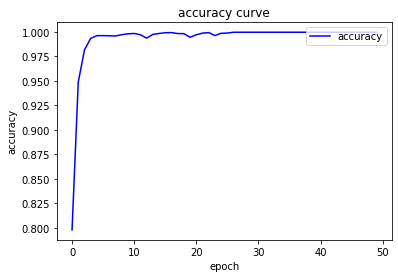

In [ ]:
from matplotlib import pyplot

pyplot.plot(h['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()

In [ ]:
#RNN

In [ ]:
import pandas as pd
import numpy as np
import math
import re
import random
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Bidirectional
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/updated_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,review,sentiment,target,length
0,8718,"hard use word movie, since contains none itsel...",positive,1,241
1,14211,say necromaniac/schizophreniac 2 series is... ...,positive,1,1271
2,48907,so-so thriller starring brad pitt juliette lew...,positive,1,480
3,29804,"sat part che last night, back back brief bathr...",positive,1,2911
4,38386,unfortunately one movie least make laugh unbel...,negative,0,782


In [ ]:
#Vectorization

In [ ]:
dataset = df
unique_label = np.unique(df["target"])
num_classes = len(unique_label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['review'].values, pd.get_dummies(dataset['target']).values, test_size=0.50)

MAX_NB_WORDS = 120811
MAX_SEQUENCE_LENGTH = 2000
EMBEDDING_DIM = 250

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index
print("found ", len(word_index), " unique tokens")

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(train_seq, maxlen=MAX_SEQUENCE_LENGTH)
pad_test = pad_sequences(test_seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', pad_train.shape)

print(pad_train.shape,y_train.shape)
print(pad_test.shape,y_test.shape)

found  120811  unique tokens
Shape of data tensor: (25000, 2000)
(25000, 2000) (25000, 2)
(25000, 2000) (25000, 2)


In [ ]:
model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=pad_train.shape[1]))
model_1.add(SimpleRNN(250, activation= 'relu'))
model_1.add(Dense(2, activation='sigmoid'))


model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model_1.summary()

epochs = 20
batch_size = 128

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2000, 250)         30202750  
                                                                 
 simple_rnn (SimpleRNN)      (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 2)                 502       
                                                                 
Total params: 30,328,502
Trainable params: 30,328,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_1.fit(pad_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(pad_test, y_test))

Epoch 1/20
196/196 [==============================] - 803s 4s/step - loss: 401834770432.0000 - accuracy: 0.6519 - val_loss: 1889.3165 - val_accuracy: 0.6656
Epoch 2/20
196/196 [==============================] - 721s 4s/step - loss: 2809433.2500 - accuracy: 0.7764 - val_loss: 0.5161 - val_accuracy: 0.7135
Epoch 3/20
196/196 [==============================] - 722s 4s/step - loss: 0.3181 - accuracy: 0.8723 - val_loss: 0.3733 - val_accuracy: 0.8365
Epoch 4/20
196/196 [==============================] - 720s 4s/step - loss: 0.1408 - accuracy: 0.9475 - val_loss: 0.3573 - val_accuracy: 0.8602
Epoch 5/20
196/196 [==============================] - 703s 4s/step - loss: 0.0965 - accuracy: 0.9712 - val_loss: 0.5167 - val_accuracy: 0.8640
Epoch 6/20
196/196 [==============================] - 711s 4s/step - loss: 0.0494 - accuracy: 0.9857 - val_loss: 0.5513 - val_accuracy: 0.8620
Epoch 7/20
196/196 [==============================] - 701s 4s/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 0.6080 - 

In [ ]:
evaluation = model_1.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

782/782 [==============================] - 148s 189ms/step - loss: 1.2553 - accuracy: 0.8506
Accuracy is :  85.0600004196167


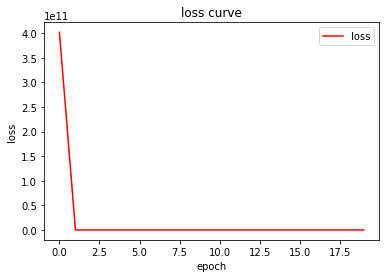

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], color='r')
# pyplot.plot(history.history['val_loss'], color='b')
pyplot.title('loss curve')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'val_loss'], loc='upper right')
pyplot.show()

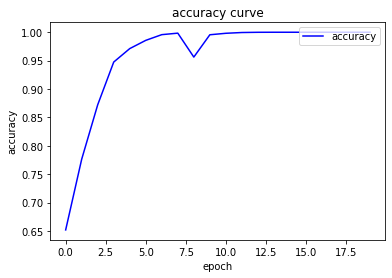

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()

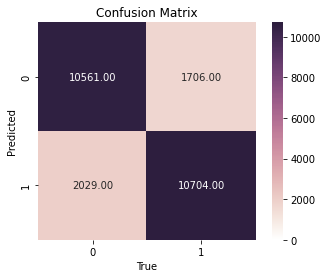

In [ ]:
y_pred = model_1.predict(pad_test)

new_y_pred = np.argmax(y_pred, axis=1)
new_y_test = np.argmax(y_test, axis=1)

conf_arr = np.zeros((num_classes, num_classes))

for i in range(len(new_y_pred)):
        conf_arr[new_y_pred[i]][new_y_test[i]] += 1

df_cm = pd.DataFrame(conf_arr, index = unique_label, columns = unique_label)


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(df_cm, annot=True, vmin=0.0, vmax=np.max(conf_arr), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [ ]:
precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print(precision)
print(f1_score)
print(recall)

84.065027880311
85.14497076721155
86.25302175664787


In [ ]:
print(classification_report(new_y_test, new_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12590
           1       0.84      0.86      0.85     12410

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print('Pricision = ',precision)
print('F1_score = ',f1_score)
print('Recall = ',recall)

Pricision =  84.065027880311
F1_score =  85.14497076721155
Recall =  86.25302175664787


In [ ]:
model_1.save('/content/drive/MyDrive/Soft Computing/Project/saved_info/RNN/v1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Soft Computing/Project/saved_info/RNN/v1/assets


In [ ]:
import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/Soft Computing/Project/saved_info/RNN/v1')

In [ ]:
evaluation = loaded_model.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

782/782 [==============================] - 150s 192ms/step - loss: 1.2553 - accuracy: 0.8506
Accuracy is :  85.0600004196167


In [ ]:
np.save('/content/drive/MyDrive/Soft Computing/Project/saved_info/RNN/v1/history.npy',history.history)

In [ ]:
h=np.load('/content/drive/MyDrive/Soft Computing/Project/saved_info/RNN/v1/history.npy',allow_pickle='TRUE').item()

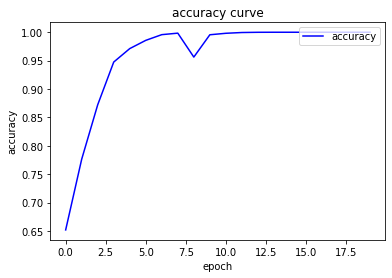

In [ ]:
from matplotlib import pyplot

pyplot.plot(h['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import math
import re
import random
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Bidirectional
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/updated_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,review,sentiment,target,length
0,29223,really liked movie. watched last night public ...,positive,1,436
1,34213,"shecky, god damned legend, make mistake. recen...",negative,0,965
2,5159,"along fernando fragata, joão mário grilo, abi ...",positive,1,391
3,5585,second alternate gundam universe tale (g-gunda...,positive,1,1651
4,20044,went see omega code group christian totaling 1...,negative,0,567


In [ ]:
dataset = df
unique_label = np.unique(df["target"])
num_classes = len(unique_label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['review'].values, pd.get_dummies(dataset['target']).values, test_size=0.50)

MAX_NB_WORDS = 120811
MAX_SEQUENCE_LENGTH = 2000
EMBEDDING_DIM = 250

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index
print("found ", len(word_index), " unique tokens")

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
pad_train = pad_sequences(train_seq, maxlen=MAX_SEQUENCE_LENGTH)
pad_test = pad_sequences(test_seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', pad_train.shape)

print(pad_train.shape,y_train.shape)
print(pad_test.shape,y_test.shape)

found  120805  unique tokens
Shape of data tensor: (25000, 2000)
(25000, 2000) (25000, 2)
(25000, 2000) (25000, 2)


In [ ]:
model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=pad_train.shape[1]))
model_1.add(LSTM(250, activation= 'tanh', return_sequences=False))
model_1.add(Dropout(0.5))
model_1.add(Dense(2, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model_1.summary()

epochs = 20
batch_size = 128

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2000, 250)         30202750  
                                                                 
 lstm_2 (LSTM)               (None, 250)               501000    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 502       
                                                                 
Total params: 30,704,252
Trainable params: 30,704,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_1.fit(pad_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 4569s 26s/step - loss: 0.4057 - accuracy: 0.8154 - val_loss: 0.2527 - val_accuracy: 0.9016
Epoch 2/20
176/176 [==============================] - 4374s 25s/step - loss: 0.2094 - accuracy: 0.9206 - val_loss: 0.2985 - val_accuracy: 0.8884
Epoch 3/20
176/176 [==============================] - 4282s 24s/step - loss: 0.0862 - accuracy: 0.9713 - val_loss: 0.3162 - val_accuracy: 0.8872
Epoch 4/20
176/176 [==============================] - 4046s 23s/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.5151 - val_accuracy: 0.8768
Epoch 5/20
 33/176 [====>.........................] - ETA: 52:13 - loss: 0.0203 - accuracy: 0.9938

In [ ]:
evaluation = model_1.evaluate(pad_test,y_test)
accuracy = evaluation[1] * 100
print("Accuracy is : ", accuracy)

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], color='r')
# pyplot.plot(history.history['val_loss'], color='b')
pyplot.title('loss curve')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'val_loss'], loc='upper right')
pyplot.show()

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()

In [ ]:
y_pred = model_1.predict(pad_test)

new_y_pred = np.argmax(y_pred, axis=1)
new_y_test = np.argmax(y_test, axis=1)

conf_arr = np.zeros((num_classes, num_classes))

for i in range(len(new_y_pred)):
        conf_arr[new_y_pred[i]][new_y_test[i]] += 1

df_cm = pd.DataFrame(conf_arr, index = unique_label, columns = unique_label)


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(df_cm, annot=True, vmin=0.0, vmax=np.max(conf_arr), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [ ]:
precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print(precision)
print(f1_score)
print(recall)

In [ ]:
print(classification_report(new_y_test, new_y_pred))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision =   precision_score(new_y_test, new_y_pred) * 100
recall =  recall_score(new_y_test, new_y_pred) * 100
f1_score =  f1_score(new_y_test, new_y_pred) * 100
print('Pricision = ',precision)
print('F1_score = ',f1_score)
print('Recall = ',recall)

In [ ]:
from matplotlib import pyplot

pyplot.plot(h['accuracy'], color='b')
# pyplot.plot(history.history['val_accuracy'], color='b')
pyplot.title('accuracy curve')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['accuracy', 'val_accuracy'], loc='upper right')
pyplot.show()